<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Making Question</div>

## Import các thư viện cần thiết

In [10]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

### Đặt câu hỏi để khai thác dữ liệu

In [11]:
cleaned_df = pd.read_csv('../Data/air_quality_cleaned.csv')
cleaned_df

,dt,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-01 00:00:00,3,700.95,0.44,35.99,17.35,32.90,20.33,26.64,8.99
1,2021-01-01 01:00:00,3,847.82,2.46,38.04,18.06,36.24,23.32,30.54,9.37
2,2021-01-01 02:00:00,3,894.55,5.25,38.39,23.25,41.01,24.16,31.93,9.25
3,2021-01-01 03:00:00,3,827.79,6.20,36.33,33.98,43.39,23.20,30.91,8.61
4,2021-01-01 04:00:00,2,660.90,3.69,29.13,54.36,35.76,19.50,25.60,6.21
...,...,...,...,...,...,...,...,...,...,...
33808,2024-11-29 20:00:00,2,600.81,1.30,37.70,5.99,23.13,21.54,27.61,9.25
33809,2024-11-29 21:00:00,2,554.08,0.75,35.99,8.85,23.13,20.50,26.39,8.36
33810,2024-11-29 22:00:00,2,567.44,0.64,36.67,10.19,24.80,22.20,28.90,8.04
33811,2024-11-29 23:00:00,2,600.81,0.76,37.36,9.66,26.23,24.03,32.19,8.61


In [12]:
cleaned_df['dt'] = pd.to_datetime(cleaned_df['dt'])
cleaned_df['aqi'] = cleaned_df['aqi'].astype('category')
cleaned_df.dtypes

dt       datetime64[ns]
aqi            category
co              float64
no              float64
no2             float64
o3              float64
so2             float64
pm2_5           float64
pm10            float64
nh3             float64
dtype: object

#### 1. Tình hình biến đổi của chỉ số bụi (PM2.5, PM10) trong khu vực nghiên cứu trong thời điểm gần nhất (tháng 11/2024) là như thế nào?
- **Trả lời câu hỏi này** sẽ giúp hiểu rõ hơn về mức độ ô nhiễm không khí vì bụi trong thời kỳ gần đây và có thể đánh giá tình hình ô nhiễm ở giai đoạn cụ thể này.
- **Để trả lời câu hỏi này**, chúng ta sẽ xét trung bình của hai chỉ số PM2.5 và PM10 trong khoảng thời gian tháng 11/2024 theo từng ngày.

In [13]:
# Tạo bản sao của data
temp_df = cleaned_df[['dt', 'pm2_5', 'pm10']] 
# Đặt cột 'dt' làm index
temp_df.set_index('dt', inplace=True)

# Group dữ liệu theo ngày 
daily_data = temp_df.resample('D').mean()  # Lấy giá trị trung bình hàng ngày

# Reset index để có DataFrame với cột 'dt' trở thành một cột thông thường
daily_data.reset_index(inplace=True)

In [14]:
# Lấy dữ liệu trong tháng 11/2024
november_2024_data = daily_data[(daily_data['dt'].dt.year == 2024) & (daily_data['dt'].dt.month == 11)]

# Lấy 2 chỉ số hạt bụi
november_2024_data

,dt,pm2_5,pm10
1400,2024-11-01,107.027917,126.827500
1401,2024-11-02,73.891667,84.750000
1402,2024-11-03,104.190000,118.992083
1403,2024-11-04,129.137083,147.219167
1404,2024-11-05,134.110833,153.666667
1405,2024-11-06,197.130000,222.540833
1406,2024-11-07,143.692500,163.832500
1407,2024-11-08,138.111667,161.637500
1408,2024-11-09,69.462500,83.458750
1409,2024-11-10,226.069583,252.958333


In [15]:
# Phân bố của 2 giá trị
november_2024_data.describe()

,dt,pm2_5,pm10
count,30,30.000000,30.000000
mean,2024-11-15 12:00:00,111.469986,132.674139
min,2024-11-01 00:00:00,15.151250,20.164167
25%,2024-11-08 06:00:00,74.749687,88.180729
50%,2024-11-15 12:00:00,115.060625,135.759792
75%,2024-11-22 18:00:00,142.297292,163.772917
max,2024-11-30 00:00:00,226.069583,252.958333
std,NaN,49.969542,55.328806


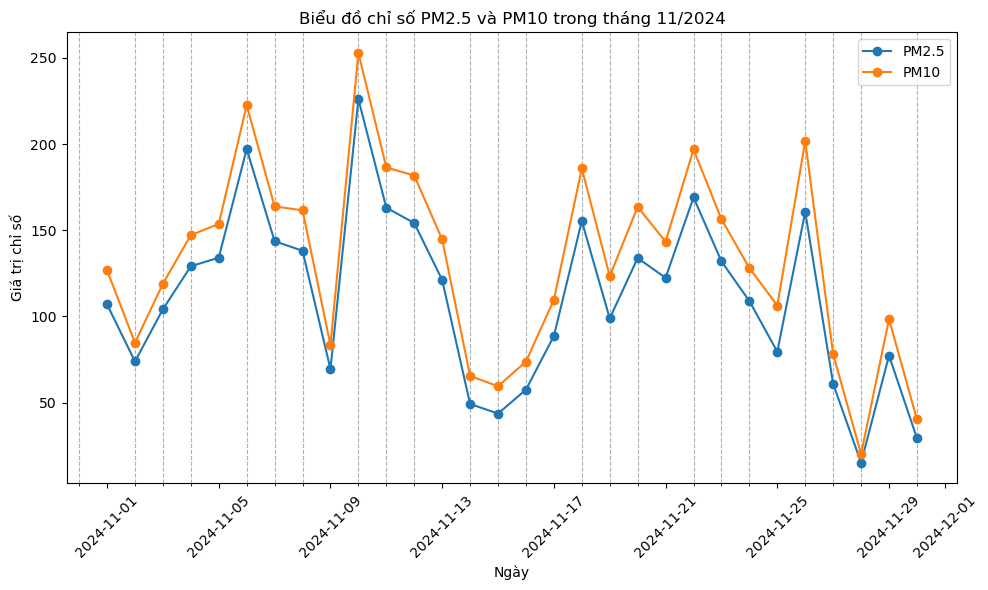

In [16]:
# Visualize data
import matplotlib.dates as mdates

# Vẽ biểu đồ đường cho pm2_5 và pm10 trong tháng 11/2024
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ cho pm2_5
plt.plot(november_2024_data['dt'], november_2024_data['pm2_5'], label='PM2.5', marker='o')

# Vẽ biểu đồ cho pm10
plt.plot(november_2024_data['dt'], november_2024_data['pm10'], label='PM10', marker='o')

# Đặt các thông tin trên biểu đồ
plt.title('Biểu đồ chỉ số PM2.5 và PM10 trong tháng 11/2024')
plt.xlabel('Ngày')
plt.ylabel('Giá trị chỉ số')
plt.legend()
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

# Thêm tick phụ cho trục x (tick phụ hàng ngày)
ax = plt.gca()
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))  # Tick phụ hàng ngày

# Hiển thị grid cho tick phụ
ax.xaxis.grid(True, which='minor', linestyle='--')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

##### Nhận xét:
- Biểu đồ trên thể hiện sự thay đổi của 2 chỉ số PM2.5 và PM10 trong tháng 11/2024. Có thể thấy sự thay đổi của 2 chỉ số này gần như là tương đương nhau tuy nhiên chỉ số PM10 luôn lớn hơn. Kết quả thấp nhất ghi nhân được là vào ngày `28/11/2024` với các chỉ số PM2.5 và PM10 lần lượt là `15.15` và `20,16` trong khi kết quả cao nhất ghi nhận được là vào ngày `10/11/2024` với các chỉ số PM2.5 và PM10 lần lượt là `226.07` và `252.96`.
- Cả 2 chỉ số đều thường xuyên giao động ở mức cao (trung bình của PM2.5 là 111,47 và của PM10 là 132,67) cho thấy bụi trong không khí rất nhiều, điều này cho thấy không khí đang bị nhiễm bụi khá nặng. Nguyên nhân có thể đến từ mật độ giao thông lớn của thành phố và các hoạt động công nghiệp.

#### 2. Liệu có sự thay đổi trong mức độ ô nhiễm trong các mùa khác nhau (mùa nắng, mùa mưa)?
- **Trả lời câu hỏi này** sẽ giúp phân tích sự thay đổi của ô nhiễm không khí qua các mùa khác nhau có thể giúp đánh giá tác động của điều kiện thời tiết đối với chất lượng không khí. Bên cạnh đó còn có thể nắm bắt được xu hướng tăng/giảm của ô nhiễm không khí giữa các mùa có thể giúp xác định các nguyên nhân có thể gây ra sự thay đổi này, ví dụ như hoạt động công nghiệp, giao thông, hay thậm chí là điều kiện thời tiết đặc biệt. Từ đó đưa ra các biện pháp phù hợp theo từng mùa
- **Để trả lời câu hỏi này**, chúng ta sẽ so sánh trung bình của các chỉ số theo từng mùa trong năm 2021 với mùa mưa từ tháng 5 đến tháng 10 và mùa nắng là các tháng còn lại của năm.

In [17]:
# Lấy dữ liệu năm 2021
temp_df = cleaned_df[cleaned_df['dt'].dt.year == 2023]

# Tạo cột 'season' để phân loại thành mùa nắng và mùa mưa dựa trên tháng
temp_df['season'] = 'Mùa nắng'
temp_df.loc[temp_df['dt'].dt.month.isin([5, 6, 7, 8, 9, 10]), 'season'] = 'Mùa mưa'

# Tính trung bình theo từng tháng trong mùa nắng và mùa mưa
season_avg_df = temp_df.groupby('season')[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']].mean()

season_avg_df

C:\Users\bkphu\AppData\Local\Temp\ipykernel_13144\998242724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['season'] = 'Mùa nắng'


,co,no2,o3,so2,pm2_5,pm10
season,,,,,,
Mùa mưa,1620.863737,33.313927,13.361910,41.878342,70.419352,82.480729
Mùa nắng,1455.592027,41.856997,38.249864,47.335176,61.604607,78.127900


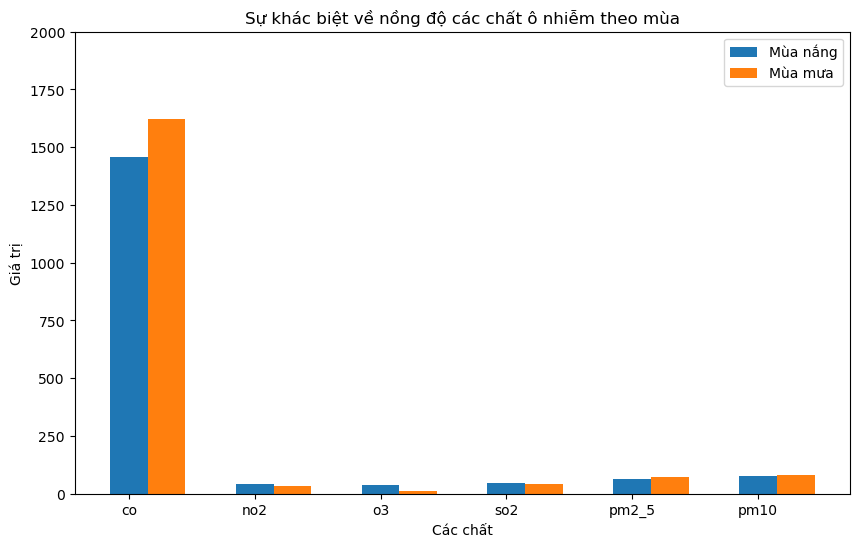

In [18]:
# Vẽ biểu đồ Grouped Bar Plot
plt.figure(figsize=(10, 6))

# Chuyển vị dữ liệu để dễ thao tác
season_avg_df_transposed = season_avg_df.T

x = range(len(season_avg_df_transposed.index))  # Đặt vị trí trục x
width = 0.3  # Đặt độ rộng của bar

sunny_values = season_avg_df_transposed['Mùa nắng'].tolist()  # Lấy giá trị của mùa nắng
rainy_values = season_avg_df_transposed['Mùa mưa'].tolist()  # Lấy giá trị của mùa mưa

plt.bar(x, sunny_values, width, label='Mùa nắng')  # Vẽ bar chart cho mùa nắng
plt.bar([i + width for i in x], rainy_values, width, label='Mùa mưa') # Vẽ bar chart cho mùa mưa 

plt.ylim(0, 2000) # Giới hạn trục y  
plt.xticks(x, season_avg_df_transposed.index)  # Đặt ticks cho trục x

# Đặt các thông tin cho biểu đồ
plt.xlabel('Các chất')  
plt.ylabel('Giá trị')  
plt.title('Sự khác biệt về nồng độ các chất ô nhiễm theo mùa')  
plt.legend() # Thêm chú thích

# Hiển thị biểu đồ
plt.show() 

- Dựa vào kết quả ở bảng và biểu đồ trên,  có thể thấy rằng các chỉ số ô nhiễm không khí có sự khác biệt đáng kể giữa mùa mưa và mùa nắng ở TP.HCM. Cụ thể:

    - Mức `CO` cao hơn ở mùa mưa (*1620.863737*) so với mùa nắng (*1455.592027*). Điều này có thể là do các nguồn phát thải CO từ các phương tiện giao thông, nhà máy, và các hoạt động đốt nhiên liệu khác thường tăng cao hơn vào mùa mưa khi nhu cầu sử dụng năng lượng cao hơn.
    - Mức `NO2` thấp hơn ở mùa mưa (*33.313927*) so với mùa nắng (*41.856997*). Điều này có thể là do các nguồn phát thải NO2 từ các phương tiện giao thông, nhà máy, và các hoạt động đốt nhiên liệu khác thường giảm thấp hơn vào mùa mưa khi thời tiết khô ráo hơn.
    - Mức `O3` thấp hơn ở mùa mưa (*13.361910*) so với mùa nắng (*38.249864*). Điều này có thể là do O3 được hình thành từ các phản ứng hóa học giữa các chất ô nhiễm không khí khác, chẳng hạn như NO2 và VOC (các hợp chất hữu cơ dễ bay hơi) dưới ánh năng mặt trời. Các phản ứng này thường xảy ra nhiều hơn vào mùa nắng.
    - Mức `SO2` thấp hơn ở mùa mưa (*41.878342*) so với mùa nắng (*47.335176*). Điều này có thể là do các nguồn phát thải SO2 từ các nhà máy đốt than thường giảm thấp hơn vào mùa mưa khi nhu cầu sử dụng điện thấp hơn.
    - Mức `PM2.5` và `PM10` cao hơn ở mùa mưa (*70.419352* và *82.480729*) so với mùa nắng (*61.604607* và *78.127900*). 

#### 3. Chỉ số chất lượng không khí (AQI) thay đổi như thế nào trong mỗi giờ (từ 0h đến 23h) của các ngày trong tuần (thứ 2 đến chủ nhật)?
- **Trả lời câu hỏi này** giúp ta đánh giá tình trạng chất lượng không khí theo từng khung giờ của các ngày trong tuần. Từ đó, chúng ta có thể xác định được thời điểm nào trong ngày có mức độ ô nhiễm không khí cao nhất, lúc nào có mức độ ô nhiễm không khí thấp nhất. Điều này giúp chúng ta có thể đưa ra các biện pháp phòng tránh ô nhiễm không khí phù hợp, chẳng hạn như hạn chế ra ngoài vào thời điểm ô nhiễm cao,... Bên cạnh đó còn có thể xác định nguyên nhân gây ô nhiễm không khí như các hoạt động công nghiệp, sản xuất, giao thông,.. đang diễn ra mạnh mẽ vào thời gian nào.
- **Để trả lời câu hỏi này** chúng ta sẽ tính chỉ số AQI trung bình rồi lưu vào một `matrix_aqi` có kích thước $7\times24$, trong đó mỗi phần tử biểu thị chỉ số AQI trung bình trong một giờ nhất định của một ngày trong tuần. Ví dụ. `matrix_aqi[1][8]` biểu thị chỉ số AQI trung bình vào thứ Ba từ 8h00m đến 8h59m.

In [19]:
# Lấy dữ liệu từ 2 cột 'dt' và 'aqi'
df_aqi = cleaned_df[['dt','aqi']]

# Trích xuất thứ trong tuần (weekday), trong đó: 0:Mon, 1:Tue, 2:Wed, 3:Thu, 4:Fri, 5:Sat, 6:Sun, rồi lưu vào cột 'Day of week'
df_aqi['Day of week'] = df_aqi ['dt'].dt.weekday

# Trích xuất giờ trong ngày rồi lưu vào cột 'Hour of day'
df_aqi['Hour of day'] = df_aqi ['dt'].dt.hour

df_aqi

C:\Users\bkphu\AppData\Local\Temp\ipykernel_13144\1613187465.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi['Day of week'] = df_aqi ['dt'].dt.weekday
C:\Users\bkphu\AppData\Local\Temp\ipykernel_13144\1613187465.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aqi['Hour of day'] = df_aqi ['dt'].dt.hour


,dt,aqi,Day of week,Hour of day
0,2021-01-01 00:00:00,3,4,0
1,2021-01-01 01:00:00,3,4,1
2,2021-01-01 02:00:00,3,4,2
3,2021-01-01 03:00:00,3,4,3
4,2021-01-01 04:00:00,2,4,4
...,...,...,...,...
33808,2024-11-29 20:00:00,2,4,20
33809,2024-11-29 21:00:00,2,4,21
33810,2024-11-29 22:00:00,2,4,22
33811,2024-11-29 23:00:00,2,4,23


In [20]:
# Tạo ma trận matrix_aqi 7x24
matrix_aqi = np.empty((7, 24))

for i in range(7):
    for j in range(24):
        aqi = df_aqi[(df_aqi['Day of week'] == i) & (df_aqi['Hour of day'] == j)]['aqi'].values  # Lấy danh sách chỉ số aqi theo giờ và ngày tương ứng trong tuần
        matrix_aqi[i, j] = np.mean(aqi.astype(int)) # Tính chỉ số aqi trung bình rồi lưu vào matrix_aqi[i][j] tương ứng

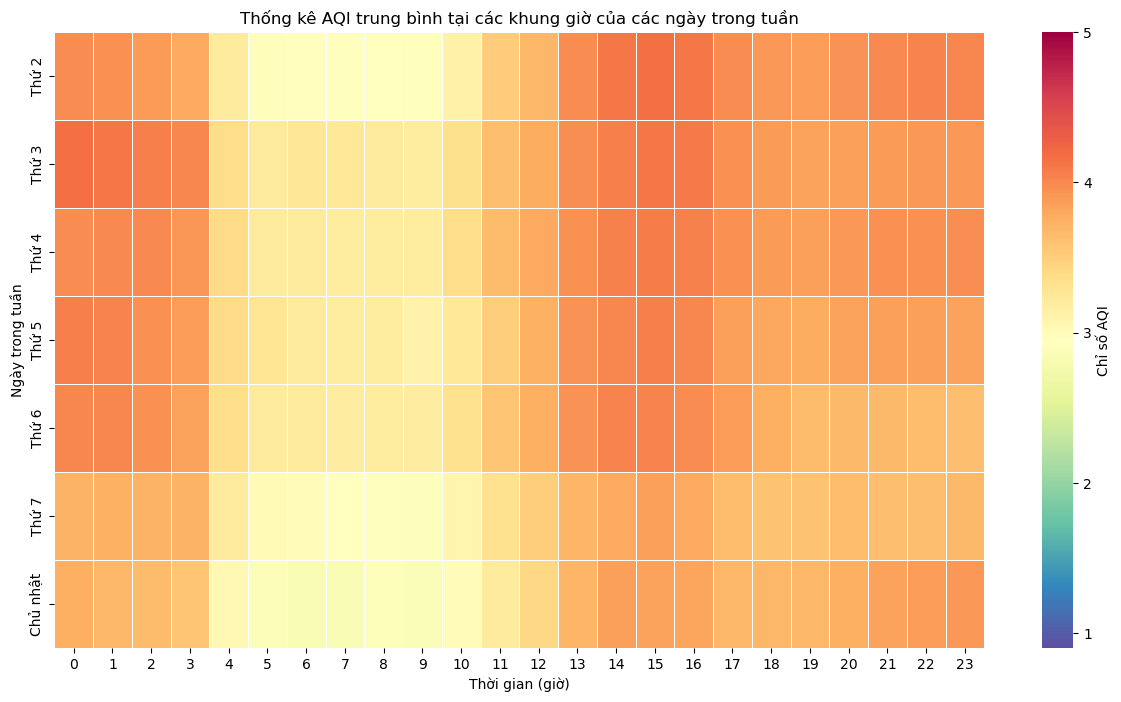

In [21]:
# Vẽ biểu đồ Heatmap 

# Tạo danh sách tên các thứ trong tuần
day_of_week = ['Thứ 2', 'Thứ 3', 'Thứ 4', 'Thứ 5', 'Thứ 6', 'Thứ 7', 'Chủ nhật']

# Vẽ biểu đồ Heatmap 
plt.figure(figsize=(15,8))
ax = sns.heatmap(matrix_aqi, linewidths=.5, yticklabels = day_of_week, vmin = 5, vmax = 1, cmap = 'Spectral_r', cbar_kws={'label': 'Chỉ số AQI', 'ticks': range(1, 6, 1)})

# Đặt các thông tin trên biểu đồ
ax.set_xlabel('Thời gian (giờ)')
ax.set_ylabel('Ngày trong tuần')
ax.set_title('Thống kê AQI trung bình tại các khung giờ của các ngày trong tuần')

plt.show()

**Nhận xét**

Dựa vào kết quả ở bảng và biểu đồ trên, có thể thấy rằng chỉ số chất lượng không khí AQI có sự thay đổi qua từng khung giờ và từng ngày trong tuần. Cụ thể như sau:
- Ta có thể quan sát thấy, chỉ số `AQI` trung bình của TP.HCM dao động ở mức từ *2-4*, nghĩa là chất lượng không khí từ *mức khá đến kém*. Tuy nhiên, đa số các khoảng thời gian thì chỉ số `AQI` trung bình chủ yếu từ *3-4*, nghĩa là chất lượng không khí ở TP.HCM đa số ở mức từ *trung bình đến kém*. 
- Vào các *ngày thứ 2, thứ 7 và chủ nhật*, vào khung giờ từ *4h đến 10h* sáng chỉ số `AQI` ở khoảng mức *2-3* nghĩa là chất lượng không khí ở TP.HCM đạt mức *khá đến trung bình* vào thời điểm này. Còn ở các *ngày thứ 3, thứ 4, thứ 5 và thứ 6*, từ *4h đến 10h* sáng chỉ số `AQI` ở khoảng mức *3-4* nghĩa là chất lượng không khí ở mức *trung bình đến kém*. Ở các khung giờ còn lại từ *11h trưa đến 3h sáng*, chỉ số `AQI` khoảng mức *4*, nghĩa là chất lượng không khí đang ở mức *kém*. Điều này cho thấy, các hoạt động công nghiệp, sản xuất, giao thông ở TP.HCM... diễn ra chủ yếu vào buổi trưa, chiều và tối. Còn thời gian buổi sáng, chất lượng không khí tương đối trong lành.
- Các chỉ số `AQI` ở các ngày *thứ 2, thứ 7 và chủ nhật* có xu hướng *thấp hơn* các ngày còn lại trong tuần ở cùng các khung giờ. Đặc biệt các ngày *thứ 4 và thứ 5*, chỉ số `AQI` ở các khung giờ thường ở mức *cao nhất* so với các ngày còn lại. Điều này có thể cho thấy mức độ hoạt động của con người, các hoạt động công nghiệp thường có xu hướng diễn ra mạnh mẽ ở các ngày giữa tuần. Còn các ngày cuối tuần, các nhà máy, khu công nghiệp, các hoạt động sản xuất có thể được tạm dừng nên chất lượng không khí vào các ngày cuối tuần thường khá hơn các ngày trong tuần.


#### 4. Trong khoảng thời gian buổi đêm so với buổi sáng trong tháng gần nhất năm 2024, có sự biến đổi đáng kể nào về nồng độ CO trong không khí?
- **Trả lời câu hỏi này** sẽ giúp chúng ta có thể xác định được xem có sự biến đổi đáng kể khí CO trong không khí giữa ngày và đêm. Sự biến đổi này có thể giúp chúng ta xác định được các yếu tố như giao thông, hoạt động công nghiệp, điều kiện thời tiết, hoặc các hoạt động con người khác có ảnh hưởng lớn đến chất lượng không khí trong các khoảng thời gian khác nhau. Nếu có sự khác biệt đáng kể, việc hiểu rõ về tác động của sự thay đổi này đến sức khỏe của con người và môi trường xung quanh sẽ quan trọng để đưa ra các biện pháp cần thiết để bảo vệ sức khỏe cộng đồng và môi trường sống.
- **Để trả lời câu hỏi này**, chúng ta sẽ so sánh trung bình của các chỉ số không khí (CO) theo khoảng thời gian sáng (6h-12h) và đêm (0h-6h) của năm 2023. Sau đó, trực quan hóa dữ liệu để quan sát.

In [22]:
# Lọc dữ liệu chỉ trong tháng 10-2024
october_2024_data = cleaned_df[(cleaned_df['dt'].dt.year == 2024) & (cleaned_df['dt'].dt.month == 10)]

# Tạo bản sao của data
temp_df = october_2024_data[['dt', 'co']].copy()

# Đặt cột 'dt' làm index
temp_df.set_index('dt', inplace=True)

# Tạo cột 'part_of_day' dựa trên giờ trong cột 'dt'
temp_df['part_of_day'] = pd.cut(temp_df.index.hour, bins=[0, 6, 12], labels=['night', 'morning'], include_lowest=True)

# Nhóm dữ liệu theo ngày và phần của ngày
daily_part_of_day = temp_df.groupby([temp_df.index.date, temp_df['part_of_day']])

# Tính giá trị trung bình từ 0h-6h và 6h-12h của từng ngày
result = daily_part_of_day.mean().unstack()
result

C:\Users\bkphu\AppData\Local\Temp\ipykernel_13144\1710558963.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_part_of_day = temp_df.groupby([temp_df.index.date, temp_df['part_of_day']])


co             
part_of_day        night      morning
2024-10-01   1750.945714  1588.821667
2024-10-02   1730.918571  2271.971667
2024-10-03   1747.130000  3068.606667
2024-10-04   1366.615714  2923.965000
2024-10-05   1176.834286  2494.495000
2024-10-06    962.257143  1631.101667
2024-10-07   1359.938571  2643.585000
2024-10-08   2233.507143  2091.726667
2024-10-09   3192.900000  3444.670000
2024-10-10   2712.250000  1559.895000
2024-10-11   2124.787143  1973.788333
2024-10-12   1417.160000  1488.685000
2024-10-13   1240.728571  2333.161667
2024-10-14   1966.475714  1250.585000
2024-10-15   3091.812857  3115.336667
2024-10-16   2235.414286  2803.805000
2024-10-17   2277.374286  2550.125000
2024-10-18   3215.790000  1746.813333
2024-10-19   1871.108571  2396.585000
2024-10-20   2601.622857  2714.793333
2024-10-21   1402.855714  2209.661667
2024-10-22    931.740000  1009.145000
2024-10-23   1232.145714  2256.393333
2024-10-24   1234.052857  1999.378333
2024-10-25   1412.391429  1380.761667
2024-10-26   1405.717143  1114.843333
2024-10-27   1069.068571  1437.505000
2024-10-28   1307.488571  1044.751667
2024-10-29   1766.204286  1388.550000
2024-10-30   1348.497143  1731.236667
2024-10-31   1179.694286  1092.591667

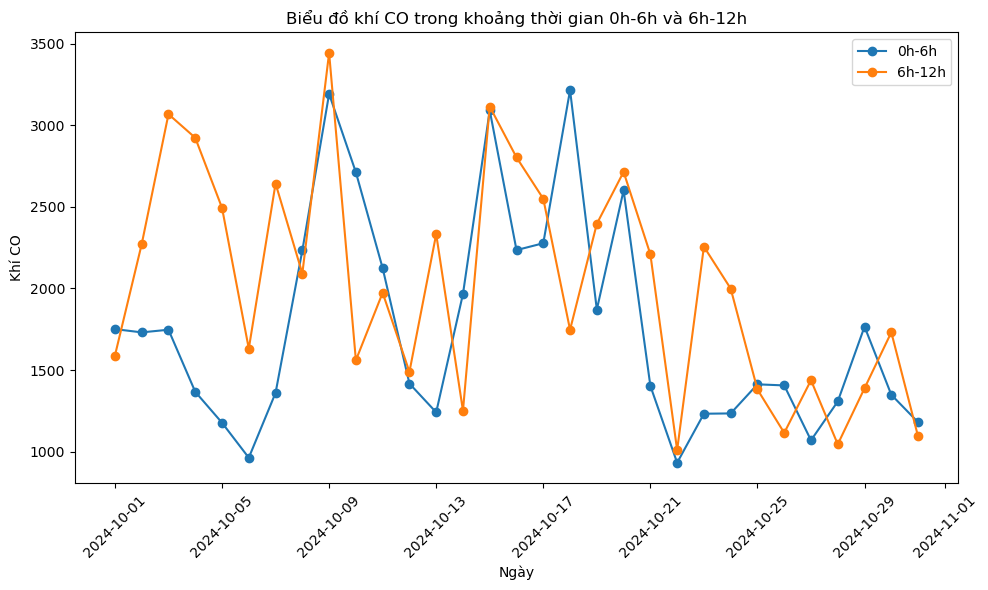

In [23]:
co_0_6 = result['co']['night']
co_6_12 = result['co']['morning']

# Tạo biểu đồ đường
plt.figure(figsize=(10, 6))

# Vẽ biểu đồ đường cho khoảng thời gian 0h-6h và 6h-12h
plt.plot(co_0_6.index, co_0_6.values, label='0h-6h', marker='o')
plt.plot(co_6_12.index, co_6_12.values, label='6h-12h', marker='o')

# Đặt các nhãn và tiêu đề cho biểu đồ
plt.xlabel('Ngày')
plt.ylabel('Khí CO')
plt.title('Biểu đồ khí CO trong khoảng thời gian 0h-6h và 6h-12h')
plt.legend()

# Hiển thị biểu đồ
plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ nhìn
plt.tight_layout()  # Đảm bảo các phần của biểu đồ không bị cắt

plt.show()

In [24]:
import pandas as pd

# Tạo DataFrame từ dữ liệu
data = {
    'date': pd.date_range(start='2024-10-01', periods=31),
    'day_value': [
        1750.945714, 1730.918571, 1747.130000, 1366.615714, 1176.834286, 962.257143, 1359.938571, 
        2233.507143, 3192.900000, 2712.250000, 2124.787143, 1417.160000, 1240.728571, 1966.475714, 
        3091.812857, 2235.414286, 2277.374286, 3215.790000, 1871.108571, 2601.622857, 1402.855714, 
        931.740000, 1232.145714, 1234.052857, 1412.391429, 1405.717143, 1069.068571, 1307.488571, 
        1766.204286, 1348.497143, 1179.694286
    ],
    'night_value': [
        1588.821667, 2271.971667, 3068.606667, 2923.965000, 2494.495000, 1631.101667, 2643.585000, 
        2091.726667, 3444.670000, 1559.895000, 1973.788333, 1488.685000, 2333.161667, 1250.585000, 
        3115.336667, 2803.805000, 2550.125000, 1746.813333, 2396.585000, 2714.793333, 2209.661667, 
        1009.145000, 2256.393333, 1999.378333, 1380.761667, 1114.843333, 1437.505000, 1044.751667, 
        1388.550000, 1731.236667, 1092.591667
    ]
}

df = pd.DataFrame(data)

# Tính trung bình cho ban ngày và ban đêm
average_day = df['day_value'].mean()
average_night = df['night_value'].mean()

print(f"Average Day Value: {average_day}")
print(f"Average Night Value: {average_night}")

Average Day Value: 1760.1750690645163
Average Night Value: 2024.4301613548384


#### Biểu đồ giá trị trung bình của chất CO trong khoảng thời gian 0h-6h và 6h-12h của tháng 10/20244

Biểu đồ thể hiện giá trị trung bình của chất CO trong khoảng thời gian 0h-6h và 6h-12h của tháng 10/20244.

**Nhận xét chung:**

* Giá trị trung bình của chất CO trong cả hai khoảng thời gian đều ở mức an toàn, không vượt quá ngưỡng an toàn cho sức khỏe con người (10000 µg/m³).
* Giá trị trung bình của chất CO trong khoảng thời gian 6h-12h cao hơn khoảng thời gian 0h-6h.

**Nhận xét chi tiết:**

* Giá trị trung bình của chất CO trong khoảng thời gian 0h-6h dao động từ 900 đến 3.2000 μg/m3, với giá trị trung bình là 1.760 μg/m3 .
* Giá trị trung bình của chất CO trong khoảng thời gian 6h-12h dao động từ 1000 đến 3.5000 μg/m3, với giá trị trung bình là 2.2024 μg/m3 .

**Giải thích:**

Giá trị trung bình của chất CO trong cả hai khoảng thời gian đều ở mức an toàn, nhưng có 1 số ngày khí CO tăng cao trong khoảng 0-6h có thể do một số nguyên nhân sau:

* Thời tiết tháng 10/2024 ở Việt Nam có nhiều ngày sương mù dày đặc, khiến cho không khí bị ô nhiễm nặng.
* Các nhà máy, xí nghiệp cũng là một nguồn phát thải khí CO lớn. Trong khoảng thời gian 0-6h, các hoạt động sản xuất thường không diễn ra nhiều. Tuy nhiên, nếu có sự cố hoặc sự cố khiến cho các nhà máy, xí nghiệp phải hoạt động hết công suất, thì nồng độ khí CO trong không khí cũng có thể tăng theo.

Giá trị trung bình của chất CO trong khoảng thời gian 6h-12h cao hơn khoảng thời gian 0h-6h có thể do một số nguyên nhân sau:

* Trong khoảng thời gian 6h-12h, các hoạt động giao thông, công nghiệp, sản xuất,... diễn ra nhiều hơn, khiến cho lượng khí thải ra môi trường cũng nhiều hơn.

**Kết luận:**

* Mức độ ô nhiễm khí CO ở Việt Nam trong tháng 10/2024 là ở ngưỡng an toàn trong cả 2 khoảng thời gian, không gây ảnh hưởng nghiêm trọng đến sức khỏe con người. Tuy nhiên, vẫn cần có các biện pháp để giảm thiểu ô nhiễm không khí, bảo vệ sức khỏe cộng đồng.
* Không có nhiều sự thay đổi đáng kể của nồng độ khí CO trong không khí của tháng 10/2024. Vẫn đảm bảo an toàn với sức khỏe con người.


#### 5. Các chất ảnh hưởng đến chất lượng không khí có xu hướng tăng hay giảm qua các tháng trong năm?
- **Trả lời câu hỏi này** giúp ta đánh giá tình trạng chất lượng không khí theo từng tháng trong năm. Từ đó, chúng ta có được một cái nhìn tổng quan về xu hướng tăng hay giảm của các chất. Điều này giúp chúng ta có thể biết được nguyên nhân chất nào càng ngày tăng trong không khí, từ đó đưa ra các biện pháp khắc phục ô nhiễm không khí phù hợp... Vì ta có thể xác định nguyên nhân gây ô nhiễm không khí như các hoạt động công nghiệp, sản xuất, giao thông,.. đang diễn ra mạnh mẽ vào thời gian nào và lĩnh vực nào là nguyên nhân gây ô nhiễm nhiều nhất.
- **Để trả lời câu hỏi này** chúng ta sẽ tính hàm lượng trung bình của 1 tháng rồi vẽ biểu đồ đường, mỗi đường là một chất và thời điểm sẽ là mỗi tháng trong năm.

In [26]:
# Tạo bản sao của data
tempData_df = cleaned_df[['dt','co','no','no2','o3','so2','pm2_5','pm10','nh3']]
tempData_df.set_index('dt', inplace=True)

#Group dữ liệu theo tháng
monthly_data = tempData_df.resample('M').mean()  # Lấy giá trị trung bình hàng tháng

# Reset index để có DataFrame với cột 'dt' trở thành một cột thông thường
monthly_data.reset_index(inplace=True)

monthly_data

,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2021-01-31,1122.597097,11.433903,44.051014,45.902986,50.500069,59.328667,75.461500,11.303486
1,2021-02-28,1215.552619,12.021652,48.128125,60.039702,56.046964,65.230685,85.290045,11.919211
2,2021-03-31,759.386210,7.332124,32.517231,48.422527,40.621694,29.149046,40.530349,7.951586
3,2021-04-30,1250.529625,18.077972,40.794903,29.289625,52.287833,51.501944,64.054792,9.540597
4,2021-05-31,1262.420269,21.518589,34.826022,20.992124,45.914449,50.046599,61.866183,9.284261
5,2021-06-30,1091.096056,10.646722,28.021750,19.260000,27.931236,43.780333,52.852778,7.975917
6,2021-07-31,982.802849,14.389113,25.890847,16.743145,30.560255,38.855054,46.780054,7.161344
7,2021-08-31,1763.566075,29.429543,34.926384,12.460860,41.675390,85.535134,97.035457,10.793938
8,2021-09-30,1757.768403,32.486431,34.015042,11.295069,44.731125,78.854333,91.447194,10.395375
9,2021-10-31,2082.089395,40.431438,39.610833,9.457715,50.863185,89.465981,104.233454,11.662191


In [27]:
# Phân bố của các giá trị
monthly_data.describe()

,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,47,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,2022-12-30 09:42:07.659574528,1550.100456,25.139916,38.566614,24.974106,46.181293,67.831532,82.210502,11.163717
min,2021-01-31 00:00:00,604.699080,3.828065,23.866667,6.616042,25.804637,16.113348,23.934899,7.020605
25%,2022-01-15 12:00:00,1107.346177,11.978222,32.125191,11.467194,40.688967,48.178484,61.125183,9.388584
50%,2022-12-31 00:00:00,1495.127372,24.147675,36.418723,17.478065,44.917755,65.230685,80.035954,11.125094
75%,2023-12-15 12:00:00,1861.871048,32.399559,45.717489,37.969701,52.463361,84.482901,96.604423,12.549931
max,2024-11-30 00:00:00,2981.855758,58.544562,58.125911,64.777667,65.974562,145.736857,164.747872,16.788925
std,NaN,571.225775,13.871255,8.581878,16.412615,9.218246,29.390956,32.512967,2.599475


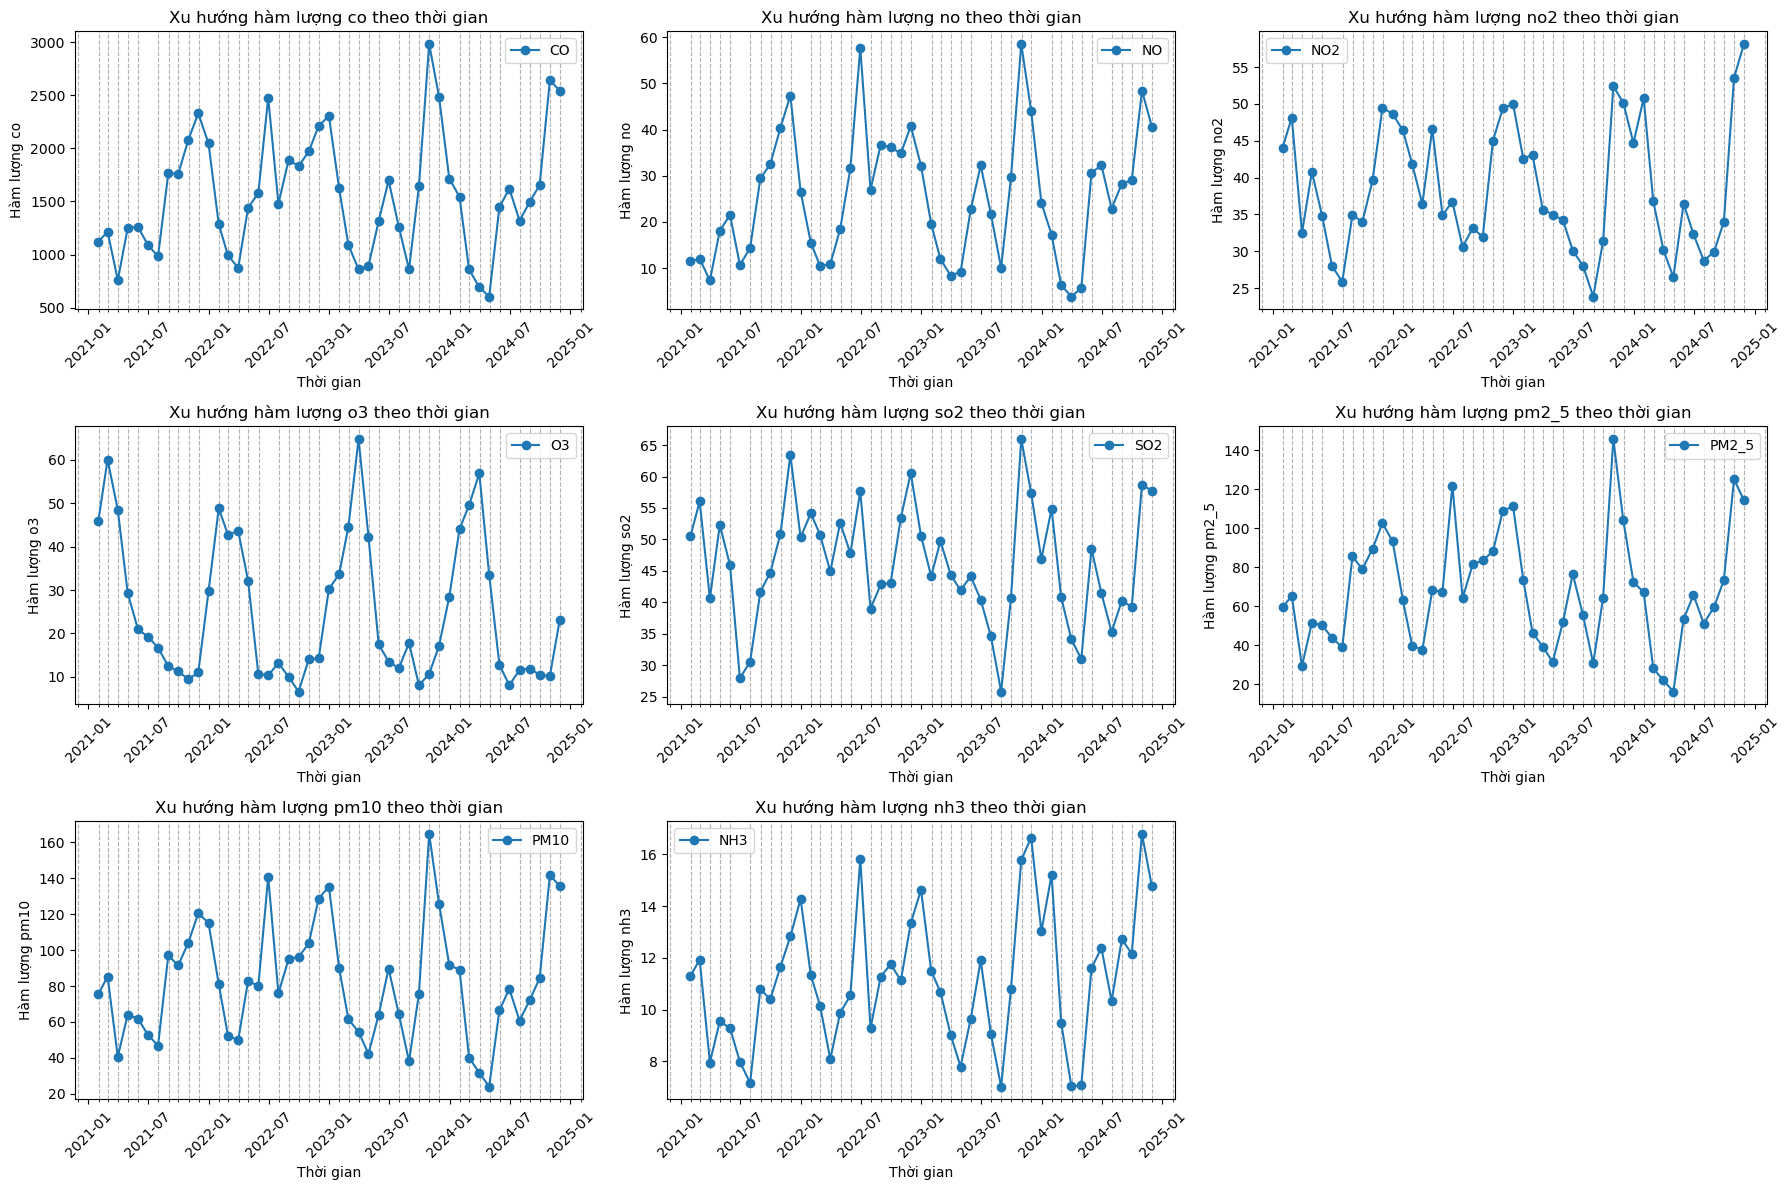

In [28]:
# Danh sách các chất để vẽ
substances = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Thiết lập kích thước của biểu đồ
plt.figure(figsize=(18, 12))

# Vòng lặp để vẽ đường cho từng chất
for i, substance in enumerate(substances, 1):
    # Tạo subplot cho từng chất trên cùng một hàng
    plt.subplot(3, 3, i)

    # Vẽ đường cho chất thứ i
    plt.plot(monthly_data['dt'], monthly_data[substance], label=substance.upper(), marker='o')

    # Đặt tên cho các trục và tiêu đề biểu đồ
    plt.xlabel('Thời gian')
    plt.ylabel('Hàm lượng ' + substance)
    plt.title('Xu hướng hàm lượng ' + substance + ' theo thời gian')
    plt.legend()
    plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn
    
    # Thêm tick phụ cho trục x (tick phụ hàng ngày)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=1))  # Tick phụ hàng ngày
    # Hiển thị grid cho tick phụ
    ax.xaxis.grid(True, which='minor', linestyle='--')
    # Hiển thị biểu đồ
    plt.tight_layout()
plt.show()

##### Nhận xét:
   - Nhìn vào biểu đồ, ta có thể thấy được hàm lượng các chất biến động rất rõ rệt theo thời gian, không theo 1 xu hướng nhất định mà tùy vào từng tháng trong năm, tuy nhiên, nhìn chung thì hàm lượng mỗi chất đều tăng dần so với thời điểm đó của năm trước, cụ thể như sau:
        - Khí CO, NO, NO2 và SO2 đều tăng vào những tháng từ tháng 8, đỉnh điểm đều rơi vào khoảng tháng 10, 11 và thấp nhất rơi vào khoảng tháng 3. Con số kỷ lục của mỗi năm cũng ngày một tăng lên.
        - Khí PM2_5, PM10 có xu hướng tăng giảm tương đương nhau, đỉnh điểm đều rơi vào tháng 10 và nhìn chung thì hàm lượng PM10 đều cao hơn so với PM2_5 nhưng chênh lệch không nhiều.
        - Ngược lại với các khí trên, hàm lượng O3 tăng đáng kể vào tháng 3 và thấp nhất vào tháng 11, 12.
        
   

 - Nhìn chung, hàm lượng các chất ô nhiễm không khí đều có xu hướng tăng dần trong giai đoạn từ năm 2021 đến năm 2024. Điều này cho thấy tình trạng ô nhiễm không khí đang ngày càng nghiêm trọng tại địa phương. Nguyên nhân chính của tình trạng này là do các hoạt động sản xuất công nghiệp, sử dụng phương tiện giao thông và đốt nhiên liệu hóa thạch, mùa thu và mùa đông thường có nguồn nhiệt đốt nhiên liệu gia tăng, chẳng hạn như sưởi ấm bằng nhiên liệu fossile dẫn đến tăng cao của các khí CO, NO, NO2, và SO2 trong không khí. Để cải thiện tình trạng ô nhiễm không khí, cần có những biện pháp tích cực từ các cơ quan chức năng và sự chung tay của người dân, mọi người cũng nên hạn chế ra đường vào những tháng có hàm lượng chất ô nhiễm cao, ảnh hướng đến sức khỏe.